In [1]:
#import libraries and functions
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from patsy import dmatrices
from scipy.stats.stats import pearsonr
from scipy import stats
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

### IMPORT DATA SET

In [2]:
#open data as df
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#create copy of df
df_copy = df.copy()

In [4]:
#examine columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#tally missing values
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
#check for duplicated cutomer ID values
df['ID'].duplicated().sum()

0

### Income column

In [7]:
#get sum of NA values in the Income column
df['Income'].isnull().sum()

24

In [8]:
#Get list of NA values by index number
df.loc[df['Income'].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


In [9]:
#drop rows with NA values in income
df.dropna(axis=0, inplace=True)

In [10]:
#check number of NA values in income column after drop
df['Income'].isnull().sum()

0

In [11]:
#identify income outliers
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

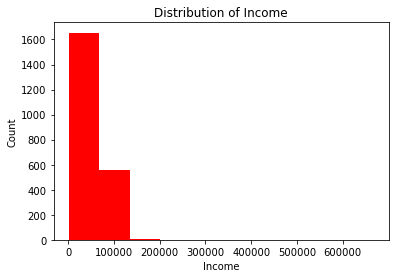

In [12]:
plt.hist(df['Income'], bins=10, facecolor='r')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

In [13]:
# remove max value above 140000, which are outliers, due to that 75% of our values are below 68522
df = df[df['Income']< 120000]

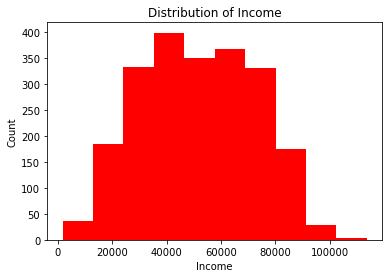

In [14]:
# histogram with outliers removed
plt.hist(df['Income'], bins=10, facecolor='r')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income')
plt.show()

In [15]:
# df with income null values and outliers removed
df.shape

(2208, 29)

In [16]:
# identify columns do not have null values and datatypes for each col.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Recency              2208 non-null   int64  
 9   MntWines             2208 non-null   int64  
 10  MntFruits            2208 non-null   int64  
 11  MntMeatProducts      2208 non-null   int64  
 12  MntFishProducts      2208 non-null   int64  
 13  MntSweetProducts     2208 non-null   int64  
 14  MntGoldProds         2208 non-null   int64  
 15  NumDealsPurchases    2208 non-null   i

### Reclassify columns

   #####   Kidhome/Teenhome

In [17]:
# create new column of 'Children' combined from Kidhome and Teenhome
dfcombinecols = ['Kidhome', 'Teenhome']
df['Children'] = df[dfcombinecols].sum(axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Children
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,1
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,3
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,1


#### Unneeded columns

In [18]:
# see unique values in column
df['Z_CostContact'].unique()

array([3], dtype=int64)

In [19]:
# see unique values in column
df['Z_Revenue'].unique()

array([11], dtype=int64)

In [20]:
#drop columns not needed provide only one value for both cols
df = df.drop(columns = ['Z_CostContact', 'Z_Revenue'])


In [21]:
# see unique values in column
df['Complain'].unique()

array([0, 1], dtype=int64)

In [22]:
#drop Complain column
df = df.drop(columns = 'Complain')

#### Marital Status

In [23]:
# see unique values in column
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [24]:
#reassign 'Marital Status' to more simplified terms
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'Relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')

In [25]:
# see unigue values after comine
df['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

In [26]:
#percentage of martial status
(df['Marital_Status'].value_counts()/df['Marital_Status'].value_counts().sum())*100

Relationship    64.447464
Single          35.552536
Name: Marital_Status, dtype: float64

<Figure size 720x720 with 0 Axes>

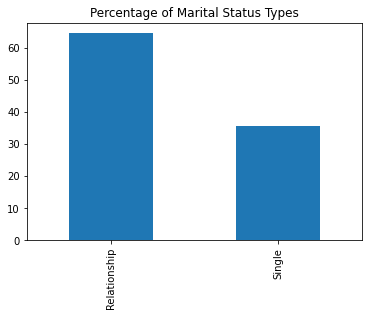

<Figure size 720x720 with 0 Axes>

In [27]:
# barchart showing percentage comparison
((df['Marital_Status'].value_counts()/df['Marital_Status'].value_counts().sum())*100).plot(kind='bar')
plt.title('Percentage of Marital Status Types')
plt.figure(figsize=(10,10))

#### Education

In [28]:
#see unique elements of Education column
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [29]:
#reassign Education to more simplified terms by combin classifications
df['Education'] = df['Education'].replace(['Graduation', 'Basic', '2n Cycle'], 'UnderGrad')
df['Education'] = df['Education'].replace(['PhD', 'Master'], 'PostGrad')

In [30]:
#education percentages
edpct = (df['Education'].value_counts()/df['Education'].value_counts().sum())*100
edpct

UnderGrad    61.911232
PostGrad     38.088768
Name: Education, dtype: float64

<Figure size 720x720 with 0 Axes>

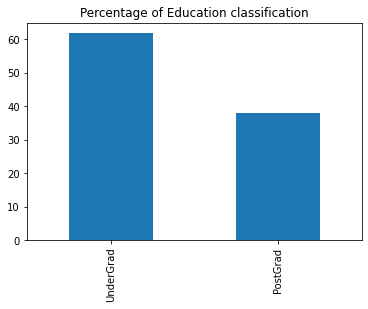

<Figure size 720x720 with 0 Axes>

In [31]:
# bar chart showing percentages of education reclassification
edpct.plot(kind='bar')
plt.title('Percentage of Education classification')
plt.figure(figsize=(10,10))

### Combine Columns

#### Comps

In [32]:
#tally AcceptedCmps & Response to one column of TotAccCmps & voew unique values
combinecols = ['AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df['TotAccCmps'] = df[combinecols].sum(axis=1)
df['TotAccCmps'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

#### Purchases

In [33]:
#create col total num purchases and populate with sum of purchases
combinecols1 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
df['TotNumPurchases'] = df[combinecols1].sum(axis=1)

#### Products

In [34]:
combinecols2 = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotProdSold'] = df[combinecols2].sum(axis=1)

#### Drop non relevant combine columns

In [35]:
# drop columns from combined columns
df = df.drop(columns = dfcombinecols, axis=1)
df = df.drop(columns = combinecols, axis=1)
df = df.drop(columns = combinecols1, axis=1)

In [36]:
# drop products columns that are not relevant to analysis ( preserve MntWines)
df = df.drop(columns = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])

In [37]:
df.shape

(2208, 13)

### Create Age Column

In [38]:
#create Age column
df['Age'] = 2022 - df['Year_Birth']

In [39]:
# sample of dataset 20
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,NumWebVisitsMonth,Children,TotAccCmps,TotNumPurchases,TotProdSold,Age
1450,5788,1972,UnderGrad,Relationship,46053.0,17-02-2013,46,56,5,1,0,12,209,50
114,9215,1980,PostGrad,Relationship,43974.0,12-12-2012,19,378,7,1,0,21,551,42
1514,3865,1977,UnderGrad,Relationship,20981.0,30-04-2013,14,2,8,0,1,7,73,45
882,8916,1975,UnderGrad,Single,36627.0,23-07-2013,78,9,5,2,0,4,16,47
273,6336,1960,UnderGrad,Relationship,29315.0,06-04-2014,55,13,6,2,0,10,48,62


In [40]:
#look for outliers max age 129
df['Age'].describe()

count    2208.000000
mean       53.192935
std        11.991913
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

In [41]:
#view unique age values
df['Age'].unique()

array([ 65,  68,  57,  38,  41,  55,  51,  37,  48,  72,  46,  63,  70,
        35,  76,  42,  73,  40,  43,  71,  53,  33,  59,  52,  49,  79,
        47,  26,  54,  58,  45,  44,  67,  56,  34,  74,  64,  50,  62,
        39,  77,  31,  60,  69,  66,  30,  61, 122,  36, 129,  32,  75,
       123,  29,  28,  81,  78,  27,  82], dtype=int64)

In [42]:
#see top 5 values
df['Age'].sort_values().tail()

424      81
1950     82
192     122
339     123
239     129
Name: Age, dtype: int64

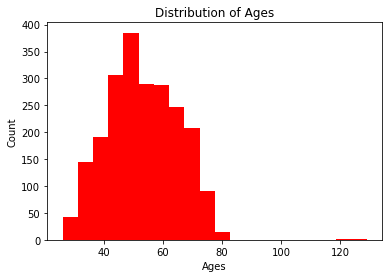

In [43]:
# chart of Distribution of ages, see outliers
plt.hist(df['Age'], bins=20, facecolor='r')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

##### Ages above 90 are outliers col contains customer with age greater than 123 due to age of data

In [44]:
#remove outliers from table
df = df[df['Age'] < 90]

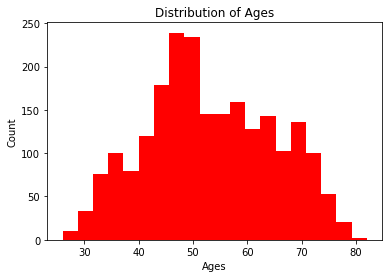

In [45]:
# chart of Distribution of ages after removal of outliers
plt.hist(df['Age'], bins=20, facecolor='r')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

In [46]:
#Age with removal of outliers
df['Age'].describe()

count    2205.000000
mean       53.095692
std        11.705801
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: Age, dtype: float64

In [47]:
df.shape

(2205, 14)

In [48]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,NumWebVisitsMonth,Children,TotAccCmps,TotNumPurchases,TotProdSold,Age
0,5524,1957,UnderGrad,Single,58138.0,04-09-2012,58,635,7,0,1,25,1617,65
1,2174,1954,UnderGrad,Single,46344.0,08-03-2014,38,11,5,2,0,6,27,68
2,4141,1965,UnderGrad,Relationship,71613.0,21-08-2013,26,426,4,0,0,21,776,57
3,6182,1984,UnderGrad,Relationship,26646.0,10-02-2014,26,11,6,1,0,8,53,38
4,5324,1981,PostGrad,Relationship,58293.0,19-01-2014,94,173,5,1,0,19,422,41


In [49]:
df.describe()

,ID,Year_Birth,Income,Recency,MntWines,NumWebVisitsMonth,Children,TotAccCmps,TotNumPurchases,TotProdSold,Age
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,5585.439456,1968.904308,51622.094785,49.009070,306.164626,5.336961,0.948753,0.450340,14.887982,606.821769,53.095692
std,3247.546423,11.705801,20713.063826,28.932111,337.493839,2.413535,0.749231,0.894075,7.615277,601.675284,11.705801
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,26.000000
25%,2815.000000,1959.000000,35196.000000,24.000000,24.000000,3.000000,0.000000,0.000000,8.000000,69.000000,45.000000
50%,5455.000000,1970.000000,51287.000000,49.000000,178.000000,6.000000,1.000000,0.000000,15.000000,397.000000,52.000000
75%,8418.000000,1977.000000,68281.000000,74.000000,507.000000,7.000000,1.000000,1.000000,21.000000,1047.000000,63.000000
max,11191.000000,1996.000000,113734.000000,99.000000,1493.000000,20.000000,3.000000,5.000000,43.000000,2525.000000,82.000000


In [50]:
df_copy1 = df.copy()

In [51]:
# rearrange column order
df = df[['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Children', 'Income', 'Dt_Customer', 'Recency', 'MntWines', 'TotProdSold', 'NumWebVisitsMonth', 'TotAccCmps', 'TotNumPurchases']]

In [52]:
df.head()

,ID,Year_Birth,Age,Education,Marital_Status,Children,Income,Dt_Customer,Recency,MntWines,TotProdSold,NumWebVisitsMonth,TotAccCmps,TotNumPurchases
0,5524,1957,65,UnderGrad,Single,0,58138.0,04-09-2012,58,635,1617,7,1,25
1,2174,1954,68,UnderGrad,Single,2,46344.0,08-03-2014,38,11,27,5,0,6
2,4141,1965,57,UnderGrad,Relationship,0,71613.0,21-08-2013,26,426,776,4,0,21
3,6182,1984,38,UnderGrad,Relationship,1,26646.0,10-02-2014,26,11,53,6,0,8
4,5324,1981,41,PostGrad,Relationship,1,58293.0,19-01-2014,94,173,422,5,0,19


In [53]:
df.shape

(2205, 14)

C:\Users\sthom\AppData\Local\Temp\ipykernel_42760\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot:>

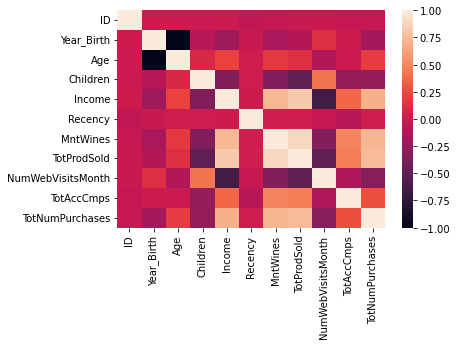

In [54]:
sns.heatmap(df.corr())

#### Drop excess columns not related to project

In [55]:
# drop all columns that are not related to Education, Income, or MntWines
subset_df = df.drop(['ID', 'Year_Birth', 'Age', 'Marital_Status', 'Children', 'Dt_Customer', 'Recency', 'NumWebVisitsMonth', 'TotAccCmps', 'TotNumPurchases', 'TotProdSold'], axis=1) 

In [56]:
subset_df.head()

,Education,Income,MntWines
0,UnderGrad,58138.0,635
1,UnderGrad,46344.0,11
2,UnderGrad,71613.0,426
3,UnderGrad,26646.0,11
4,PostGrad,58293.0,173


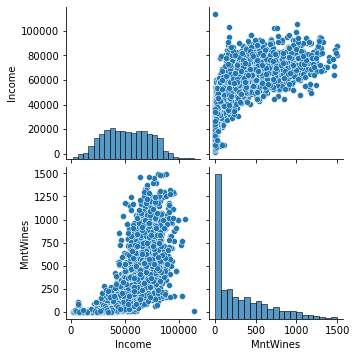

In [57]:
# create a pairplot to see relevance of project features to each from subset_df
# education is not plotted due to it not being a numerical value
sns.pairplot(subset_df)

In [58]:
y, X = dmatrices('MntWines ~ Income + Education', subset_df, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif

,VIF Factor,features
0,9.510008,Intercept
1,1.008873,Education[T.UnderGrad]
2,1.008873,Income


#### VIF, Variance Inflation Factor  - vif values over 2.5 indicate a good amount of collinearity values greater than 10 are not acceptable. A VIF of 1 indicates no collinearity with other variables. Choueiry, G. (2020) Quantifying health, QUANTIFYING HEALTH. Available at: https://quantifyinghealth.com/vif-threshold/  (Accessed: January 28, 2023). 

In [59]:
# see correlation numbers for subset_df  this correlation does not account for grouping of data between post and under education levels
subset_df.corr(method = 'pearson')

C:\Users\sthom\AppData\Local\Temp\ipykernel_42760\3936942528.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  subset_df.corr(method = 'pearson')


,Income,MntWines
Income,1.000000,0.730495
MntWines,0.730495,1.000000


#### Postgrad 

In [60]:
# seperate postgrad rows from undergrad in variable named post
post = subset_df[df['Education']== 'PostGrad']
post.head()

,Education,Income,MntWines
4,PostGrad,58293.0,173
5,PostGrad,62513.0,520
7,PostGrad,33454.0,76
8,PostGrad,30351.0,14
9,PostGrad,5648.0,28


In [61]:
post.describe()

,Income,MntWines
count,840.000000,840.000000
mean,54097.814286,376.733333
std,18860.490397,378.278987
min,4023.000000,2.000000
25%,38698.750000,42.000000
50%,53802.000000,233.000000
75%,68098.250000,622.750000
max,113734.000000,1493.000000


In [62]:
# average postincome
avgpostincome = round(post['Income'].sum()/len(post), 2)
avgpostincome

54097.81

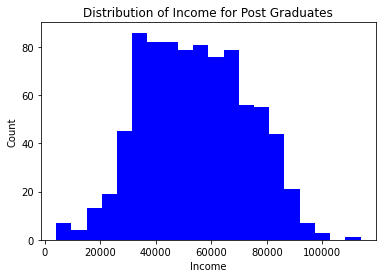

In [63]:
# histogram of distribution of PostGrad income
plt.hist(post['Income'], bins=20, facecolor='b')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income for Post Graduates')
plt.show()

Text(0.5, 1.0, 'Amount of Wine sold by PostGrad Income')

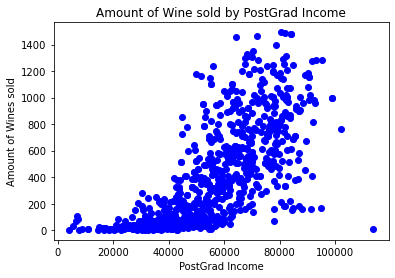

In [64]:
plt.scatter(post['Income'], post['MntWines'], color='blue')
plt.xlabel('PostGrad Income')
plt.ylabel('Amount of Wines sold')
plt.title('Amount of Wine sold by PostGrad Income')

#### Undergrad average income

In [65]:
# seperate undergrad rows from postgrad in variable named under
under = subset_df[df['Education']== 'UnderGrad']
under.head()

,Education,Income,MntWines
0,UnderGrad,58138.0,635
1,UnderGrad,46344.0,11
2,UnderGrad,71613.0,426
3,UnderGrad,26646.0,11
6,UnderGrad,55635.0,235


In [66]:
under.describe()

,Income,MntWines
count,1365.000000,1365.000000
mean,50098.575092,262.737729
std,21641.236860,301.786120
min,1730.000000,0.000000
25%,31859.000000,15.000000
50%,49431.000000,157.000000
75%,68487.000000,434.000000
max,105471.000000,1492.000000


In [67]:
# average underincome
avgunderincome = round(under['Income'].sum()/len(under), 2)
avgunderincome

50098.58

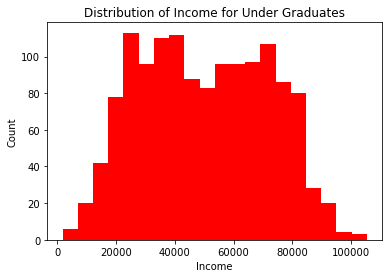

In [68]:
# distribution of income by UnderGrad income
plt.hist(under['Income'], bins=20, facecolor='r')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Distribution of Income for Under Graduates')
plt.show()

Text(0.5, 1.0, 'Amount of Wine Sales by UnderGrad Income')

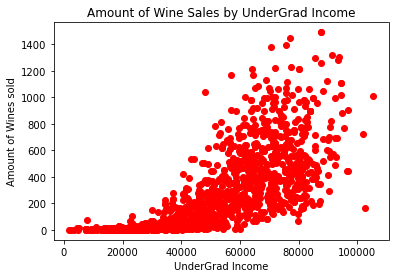

In [69]:
plt.scatter(under['Income'], under['MntWines'], color='red')
plt.xlabel('UnderGrad Income')
plt.ylabel('Amount of Wines sold')
plt.title('Amount of Wine Sales by UnderGrad Income')

#### Customer income difference by education

In [70]:
incomediff = round(avgpostincome - avgunderincome)
incomediff

3999

#### there is approximately a 4000 dollar difference between Postgrad customers and Undergrad customers

### Linear Regression

### PostGrad income relation to amount of Wines sold

In [71]:
post.head()

,Education,Income,MntWines
4,PostGrad,58293.0,173
5,PostGrad,62513.0,520
7,PostGrad,33454.0,76
8,PostGrad,30351.0,14
9,PostGrad,5648.0,28


In [72]:
X = post.drop(['Education'], axis=1)

In [73]:
X.head()

,Income,MntWines
4,58293.0,173
5,62513.0,520
7,33454.0,76
8,30351.0,14
9,5648.0,28


#### post training model

In [74]:
# Training Model
X = post['Income'].to_numpy().reshape((-1, 1))
y = post['MntWines'].to_numpy()


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [76]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

In [77]:
train_model = lm.fit(X_train, y_train)
r_sq = round(train_model.score(X_train, y_train), 2)
print('post training model R2 score:', r_sq)

post training model R2 score: 0.53


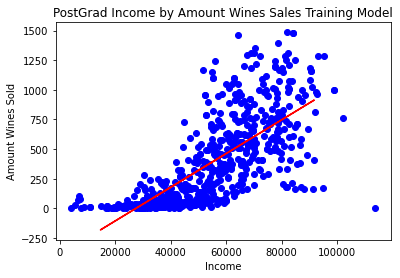

In [78]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_test, y_pred, color='r')
plt.xlabel('Income')
plt.ylabel('Amount Wines Sold')
plt.title('PostGrad Income by Amount Wines Sales Training Model')
plt.show()

#### post test model

In [79]:
test_model = lm.fit(X_test, y_test)
r_sq = round(test_model.score(X_test, y_test), 2)
print('post test model R2 score:', r_sq)

post test model R2 score: 0.54


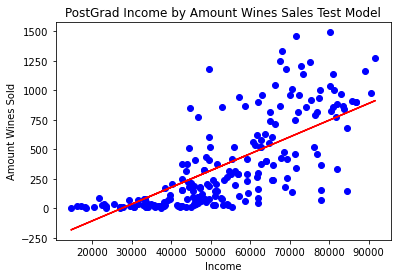

In [80]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='r')
plt.xlabel('Income')
plt.ylabel('Amount Wines Sold')
plt.title('PostGrad Income by Amount Wines Sales Test Model')
plt.show()

In [81]:
#convert X_test back to 1D array
X_test = np.reshape(X_test, -1)


In [97]:
r, p_values = stats.pearsonr(X_test, y_test)
print('Post Grad scores')
print('The Pearson correlation coefficient', round(r, 2))
print('P-value                            ', p_values)



Post Grad scores
The Pearson correlation coefficient 0.73
P-value                             9.596923004499775e-37


### UnderGrad income relation to amount of Wines sold

#### under training model

In [83]:
under.head()

,Education,Income,MntWines
0,UnderGrad,58138.0,635
1,UnderGrad,46344.0,11
2,UnderGrad,71613.0,426
3,UnderGrad,26646.0,11
6,UnderGrad,55635.0,235


In [84]:
X1 = under.drop(['Education'], axis=1)

In [85]:
X1.head()

,Income,MntWines
0,58138.0,635
1,46344.0,11
2,71613.0,426
3,26646.0,11
6,55635.0,235


In [86]:
# Training Model
X1 = under['Income'].to_numpy().reshape((-1, 1))
y1 = under['MntWines'].to_numpy()


In [87]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=0)

In [88]:
lm = LinearRegression()
lm.fit(X1_train, y1_train)
y1_pred = lm.predict(X1_test)

In [89]:
train_model = lm.fit(X1_train, y1_train)
r_sq = round(train_model.score(X1_train, y1_train), 2)
print('under training model R2 score:', r_sq)

under training model R2 score: 0.55


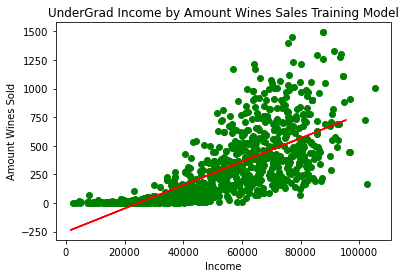

In [90]:
plt.scatter(X1_train, y1_train, color='green')
plt.plot(X1_test, y1_pred, color='r')
plt.xlabel('Income')
plt.ylabel('Amount Wines Sold')
plt.title('UnderGrad Income by Amount Wines Sales Training Model')
plt.show()

#### under test model

In [92]:
test_model = lm.fit(X1_test, y1_test)
r_sq = round(test_model.score(X1_test, y1_test), 2)
print('under test model R2 score:', r_sq)

under test model R2 score: 0.6


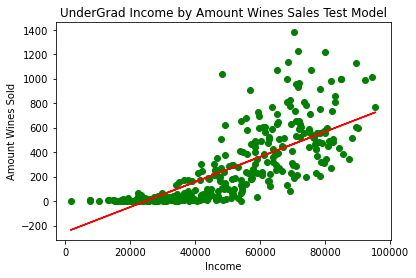

In [93]:
plt.scatter(X1_test, y1_test, color='green')
plt.plot(X1_test, y1_pred, color='r')
plt.xlabel('Income')
plt.ylabel('Amount Wines Sold')
plt.title('UnderGrad Income by Amount Wines Sales Test Model')
plt.show()

In [94]:
#convert X_test back to 1D array
X1_test = np.reshape(X1_test, -1)

In [96]:
# Undergrad income relation to Amount of Wine sales
r, p_values = stats.pearsonr(X1_test, y1_test)
print('Under Grad scores')
print('The Pearson correlation coefficient', round(r, 2))
print('P-value                            ', p_values)

Under Grad scores
The Pearson correlation coefficient 0.77
P-value                             4.778342928674882e-69
